# My Linear Algebra study

## Vectors

In [345]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

A vector is a mathematical object that has both magnitude (length) and direction. It is typically represented as an ordered list of numbers (coordinates) in a particular space (e.g., 2D or 3D space). Vectors are often used to represent quantities like velocity, force, or displacement in physics, where both the size and direction matter.

Key Properties:
- Magnitude: The length or size of the vector.
- Direction: The way the vector is oriented in space.
- Components: The individual numbers that describe the vector in terms of a coordinate system.

let's start by making two 3-dimensional vectors:

In [346]:
a = np.random.randint(0,10,(3,))
b = np.random.randint(0,10,(3,))
print(f"the vector a:{a}, and b:{b}")

the vector a:[7 4 3], and b:[8 4 7]


these three numbers of each vector represent the coordinates **x, y** and **z** in 3-dimensional space, like:
$$[\;n_1,\; n_2,\; n_3\;] = [\;x,\; y,\; z\;]$$

we'll call them the vectors **A** and **B**

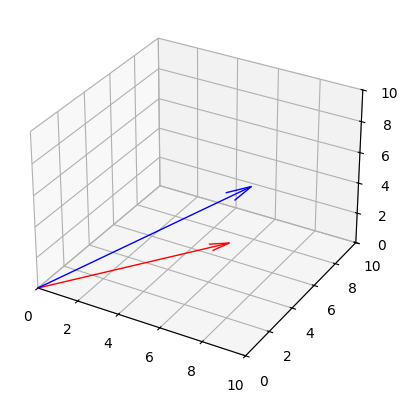

In [347]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)

ax = plt.axes(projection='3d')

origin = np.zeros(3)

ax.quiver(*origin, *a, color='red', label="a", arrow_length_ratio=0.1,linewidth=1)
ax.quiver(*origin, *b, color='blue', label="b", arrow_length_ratio=0.1,linewidth=1)

ax.set_xlim([0, 10])  
ax.set_ylim([0, 10])  
ax.set_zlim([0, 10]) 

plt.show()

### Magnitude of a vector

with these vectors we can calculate some cool stuff, firstly we can find the magnitude of them

to calculate the magnitude $\| \mathbf{v}\|$ (this is the notation) of the vector $\mathbf{v}$ in $R^{n}$ we use the following method:
$$\| v \|=\sqrt{(v_1)^2+(v_2)^2+(v_3)^2+\cdots+(v_n)^2}$$
implemented in python:

In [348]:
norm_a = math.sqrt(sum([x**2 for x in a]))
norm_b = math.sqrt(sum([x**2 for x in b]))
print(f"magnitude of a: {round(norm_a, 4)}, and b: {round(norm_b, 4)}")

magnitude of a: 8.6023, and b: 11.3578


### Normalizing 

This formula gives us the magnitude (or length) of the vector. 

one of the many cool things we can do with the magnitude is using it in the process of normalizing a vector results in its corresponding **unit vector**.
Unit vectors have a magnitude of *1* and are used primarily to specify direction, independent of the vector’s original magnitude. They are especially useful in fields like physics and mathematics to represent directions in space.

to normalize we use just divide each element of the vector $\mathbf{v}$ by the **magnitude**:
$$\frac{1}{\| \mathbf{v}\|} \cdot \mathbf{v}

### Unit Vectors

In [349]:
a_n = a/norm_a
b_n = b/norm_b
print(f"the unitary vector for a is: {a_n}, and for b: {b_n}")

the unitary vector for a is: [0.81373347 0.46499055 0.34874292], and for b: [0.70436073 0.35218036 0.61631563]


now if we plot them we have (they'll appear small, but they have the same direction as the above):

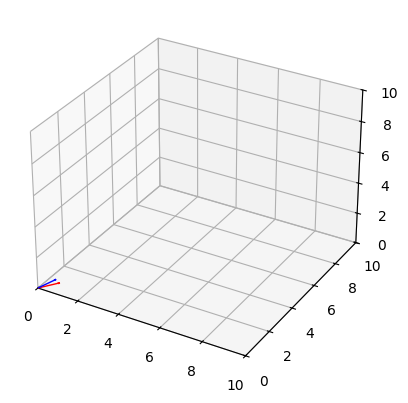

In [350]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)

ax = plt.axes(projection='3d')

origin = np.zeros(3)

ax.quiver(*origin, *a_n, color='red', label="a", arrow_length_ratio=0.1,linewidth=1)
ax.quiver(*origin, *b_n, color='blue', label="b", arrow_length_ratio=0.1,linewidth=1)

ax.set_xlim([0, 10])  
ax.set_ylim([0, 10])  
ax.set_zlim([0, 10]) 

plt.show()

now resulting in two vectors with magnitude of **1** that will keep the direction of the original.

In [351]:
norm_a = math.sqrt(sum([x**2 for x in a_n]))
norm_b = math.sqrt(sum([x**2 for x in b_n]))
print(f"magnitude of a: {round(norm_a, 4)}, and b: {round(norm_b, 4)}")

magnitude of a: 1.0, and b: 1.0


we could use these normalized vectors as a combination to remake the original vector using scalars (scalars meaning a number we multiply the vectors by).

In the $\real^n$ space we have unit vectors of:
$$(1,0,0,\cdots,n),\; (0,1,0,\cdots,n),\; (0,0,1,\cdots,n),\;\cdots,\;(0,0,0,\cdots,1)$$ 

### Distance

in a similar way to the **magnitude** formula we can also calculate the distance between two vectors. Per example the vectors  **u** and **v**:
$$d(u,v)=\sqrt{(u_1 - v_1)^2+(u_2 - v_2)^2+(u_3 - v_3)^2+\cdots+(u_n - v_n)^2}
$$
using or original **a** and **b**, the distance between them is:

In [352]:
distance = math.sqrt(sum([(u - v)**2 for u,v in zip(a,b)]))
print(distance)

4.123105625617661


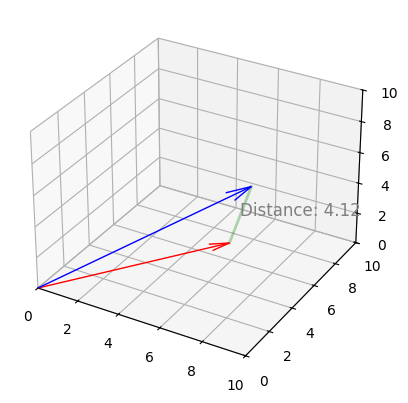

In [353]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)

ax = plt.axes(projection='3d')

origin = np.zeros(3)

ax.quiver(*origin, *a, color='red', label="a", arrow_length_ratio=0.1,linewidth=1)
ax.quiver(*origin, *b, color='blue', label="b", arrow_length_ratio=0.1,linewidth=1)

#the new line to show distance
ax.plot([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], color='green', label='Distance', linewidth=2, alpha=0.3)

#the text for distance
midpoint = (a + b) / 2  
ax.text(midpoint[0], midpoint[1], midpoint[2], f'Distance: {distance:.2f}', color='gray', fontsize=12)

ax.set_xlim([0, 10])  
ax.set_ylim([0, 10])  
ax.set_zlim([0, 10]) 

plt.show()

### Dot Product

Another cool and important thing we can do with the magnitude of a vector is find the dot product.

The dot product (also known as the scalar product) is a fundamental operation between two vectors that results in a scalar. It’s used to measure the degree of similarity between two vectors, and it has many important applications in physics, computer graphics, and machine learning, among others.

For example, we can calculate it using the vectors **u** and **v**:

$$
\mathbf{u} \cdot \mathbf{v} = \|\mathbf{u}\| \|\mathbf{v}\| \cos(\theta)
$$
We can also find a per-component formula:

$$
\mathbf{u} \cdot \mathbf{v} = u_1 v_1 + u_2 v_2 + u_3 v_3 + \cdots + u_n v_n
$$

This is the per-component formula for the dot product, where each pair of corresponding components from the vectors u and v is multiplied and summed.
